# Crimes Against Children in India (2022) — Data Cleaning, Analysis & Visualization using Julia

## Introduction

This project analyzes state-wise crime data against children in India for the year 2022, sourced from [data.gov.in](https://data.gov.in). Using Julia, we clean and transform the dataset, identify key crime categories (such as those under the POCSO Act, child labor, and cybercrimes), and visualize trends by state and gender.

> **Note:** The column-cleaning cell is intentionally duplicated to ensure complete renaming when using **"Restart Kernel and Run All"** in JupyterLab.


In [ ]:
using Pkg

# Activate the root project (one level above the notebook folder)
Pkg.activate("..")

In [2]:
# Generate Project.toml and Manifest.toml

Pkg.instantiate()

In [ ]:
Pkg.add(["CSV", "DataFrames", "DataFramesMeta", "Statistics", "Plots", "PrettyTables", "CategoricalArrays"])

In [4]:
using CSV, DataFrames, DataFramesMeta, Statistics, Plots, PrettyTables, CategoricalArrays

## Dataset Overview

This dataset provides state-wise and union territory-wise data on crimes against children in India for the year 2022. It includes:

- **Incident counts**, **number of victims**, and **crime rates** for each crime type.
- Detailed classification based on **Indian Penal Code (IPC)** sections and other relevant legal categories.
- Gender-wise victim counts (boys/girls) for specific crime types, including POCSO-related offenses.

The dataset covers over 200 columns and 36 rows (one for each state and union territory), offering a comprehensive view of the scale and distribution of child-related crimes across the country.


In [5]:
df = CSV.read("../data/crimesAgainstChildren2022.csv", DataFrame)

Row,Sl. No.,State/UT,Murder (Sec.302 IPC) - Murder (Sec.302 IPC) - I - Col.(3),Murder (Sec.302 IPC) - Murder (Sec.302 IPC) - V - Col.(4),Murder (Sec.302 IPC) - Murder (Sec.302 IPC) - R - Col.(5),Murder (Sec.302 IPC) - A) Murder with Rape/POCSO - I - Col.(6),Murder (Sec.302 IPC) - A) Murder with Rape/POCSO - V - Col.(7),Murder (Sec.302 IPC) - A) Murder with Rape/POCSO - R - Col.(8),Murder (Sec.302 IPC) - B) Other Murder - I - Col.(9),Murder (Sec.302 IPC) - B) Other Murder - V - Col.(10),Murder (Sec.302 IPC) - B) Other Murder - R - Col.(11),Abetment of Suicide of Child (Sec.305 IPC) - I - Col.(12),Abetment of Suicide of Child (Sec.305 IPC) - V - Col.(13),Abetment of Suicide of Child (Sec.305 IPC) - R - Col.(14),Attempt to Commit Murder (Sec. 307 IPC) - I - Col.(15),Attempt to Commit Murder (Sec. 307 IPC) - V - Col.(16),Attempt to Commit Murder (Sec. 307 IPC) - R - Col.(17),Infanticide (Sec.315 IPC) - I - Col.(18),Infanticide (Sec.315 IPC) - V - Col.(19),Infanticide (Sec.315 IPC) - R - Col.(20),Foeticide (Sec. 315 and 316 IPC) - I - Col.(21),Foeticide (Sec. 315 and 316 IPC) - V - Col.(22),Foeticide (Sec. 315 and 316 IPC) - R - Col.(23),Exposure and Abandonment (Sec.317 IPC) - I - Col.(24),Exposure and Abandonment (Sec.317 IPC) - V - Col.(25),Exposure and Abandonment (Sec.317 IPC) - R - Col.(26),"Simple Hurt (Sec.323 r/w 324,332,353, 327,328, 330 IPC) - I - Col.(27)","Simple Hurt (Sec.323 r/w 324,332,353, 327,328, 330 IPC) - V - Col.(28)","Simple Hurt (Sec.323 r/w 324,332,353, 327,328, 330 IPC) - R - Col.(29)","Grievous Hurt (Sec.325,326,326A, 326B,329,331,333, 335 IPC) - I - Col.(30)","Grievous Hurt (Sec.325,326,326A, 326B,329,331,333, 335 IPC) - V - Col.(31)","Grievous Hurt (Sec.325,326,326A, 326B,329,331,333, 335 IPC) - R - Col.(32)","Kidnapping and Abduction of Children - Kidnapping and Abduction of Children (Sec.363,363A,364,364A, 365, 366, 366A, 367, 368, 369 IPC) - I - Col.(33)","Kidnapping and Abduction of Children - Kidnapping and Abduction of Children (Sec.363,363A,364,364A, 365, 366, 366A, 367, 368, 369 IPC) - V - Col.(34)","Kidnapping and Abduction of Children - Kidnapping and Abduction of Children (Sec.363,363A,364,364A, 365, 366, 366A, 367, 368, 369 IPC) - R - Col.(35)",Kidnapping and Abduction of Children - Kidnapping and Abduction (Sec. 363 IPC) - Kidnapping and Abduction (Sec. 363 IPC) (Total) - I - Col.(36),Kidnapping and Abduction of Children - Kidnapping and Abduction (Sec. 363 IPC) - Kidnapping and Abduction (Sec. 363 IPC) (Total) - V - Col.(37),Kidnapping and Abduction of Children - Kidnapping and Abduction (Sec. 363 IPC) - Kidnapping and Abduction (Sec. 363 IPC) (Total) - R - Col.(38),Kidnapping and Abduction of Children - Kidnapping and Abduction (Sec.363 IPC) - A) Missing Children Deemed as Kidnapped - I - Col.(39),Kidnapping and Abduction of Children - Kidnapping and Abduction (Sec.363 IPC) - A) Missing Children Deemed as Kidnapped - V - Col.(40),Kidnapping and Abduction of Children - Kidnapping and Abduction (Sec.363 IPC) - A) Missing Children Deemed as Kidnapped - R - Col.(41),Kidnapping and Abduction of Children - Kidnapping and Abduction (Sec.363 IPC) - B) Other Kidnapping and Abduction - I - Col.(42),Kidnapping and Abduction of Children - Kidnapping and Abduction (Sec.363 IPC) - B) Other Kidnapping and Abduction - V - Col.(43),Kidnapping and Abduction of Children - Kidnapping and Abduction (Sec.363 IPC) - B) Other Kidnapping and Abduction - R - Col.(44),Kidnapping and Abduction of Children - Kidnapping and Abduction for the Purpose of Begging (Sec 363A IPC) - I - Col.(45),Kidnapping and Abduction of Children - Kidnapping and Abduction for the Purpose of Begging (Sec 363A IPC) - V - Col.(46),Kidnapping and Abduction of Children - Kidnapping and Abduction for the Purpose of Begging (Sec 363A IPC) - R - Col.(47),Kidnapping and Abduction of Children - Kidnapping and Abduction in order to Murder (Sec.364 IPC) - I - Col.(48),Kidnapping and Abduction of Children - Kidnapping and Abduction in order to Murder

In [6]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Sl. No.,,1,,Total UT (S),0,String15
2,State/UT,,Andaman and Nicobar Islands,,West Bengal,0,String
3,Murder (Sec.302 IPC) - Murder (Sec.302 IPC) - I - Col.(3),91.9231,0,22.0,1195,0,Int64
4,Murder (Sec.302 IPC) - Murder (Sec.302 IPC) - V - Col.(4),103.077,0,22.0,1340,0,Int64
5,Murder (Sec.302 IPC) - Murder (Sec.302 IPC) - R - Col.(5),0.34359,0.0,0.3,0.9,0,Float64
6,Murder (Sec.302 IPC) - A) Murder with Rape/POCSO - I - Col.(6),7.61538,0,1.0,99,0,Int64
7,Murder (Sec.302 IPC) - A) Murder with Rape/POCSO - V - Col.(7),9.38462,0,1.0,122,0,Int64
8,Murder (Sec.302 IPC) - A) Murder with Rape/POCSO - R - Col.(8),0.0435897,0.0,0.0,0.9,0,Float64
9,Murder (Sec.302 IPC) - B) Other Murder - I - Col.(9),84.3077,0,17.0,1096,0,Int64


In [7]:
names(df)

209-element Vector{String}:
 "Sl. No."
 "State/UT"
 "Murder (Sec.302 IPC) - Murder (Sec.302 IPC) - I - Col.(3)"
 "Murder (Sec.302 IPC) - Murder (Sec.302 IPC) - V - Col.(4)"
 "Murder (Sec.302 IPC) - Murder (Sec.302 IPC) - R - Col.(5)"
 "Murder (Sec.302 IPC) - A) Murder with Rape/POCSO - I - Col.(6)"
 "Murder (Sec.302 IPC) - A) Murder with Rape/POCSO - V - Col.(7)"
 "Murder (Sec.302 IPC) - A) Murder with Rape/POCSO - R - Col.(8)"
 "Murder (Sec.302 IPC) - B) Other Murder - I - Col.(9)"
 "Murder (Sec.302 IPC) - B) Other Murder - V - Col.(10)"
 "Murder (Sec.302 IPC) - B) Other Murder - R - Col.(11)"
 "Abetment of Suicide of Child (Sec.305 IPC) - I - Col.(12)"
 "Abetment of Suicide of Child (Sec.305 IPC) - V - Col.(13)"
 ⋮
 "Cyber Crimes/Information Techno" ⋯ 34 bytes ⋯ "gainst Children - I - Col.(198)"
 "Cyber Crimes/Information Techno" ⋯ 34 bytes ⋯ "gainst Children - V - Col.(199)"
 "Cyber Crimes/Information Techno" ⋯ 34 bytes ⋯ "gainst Children - R - Col.(200)"
 "Other SLL crimes - I - Co

In [8]:
nrow(df)

39

In [9]:
ncol(df)

209

## Column Name Cleaning

Many original column names in the dataset are long, repetitive, and contain unnecessary legal references or formatting artifacts. For example:

- **Original:** `Murder (Sec.302 IPC) - Murder (Sec.302 IPC) - I - Col.(3)`
- **Cleaned:** `murder_i`

The cleaning process involved:
- Lowercasing all text.
- Removing legal references like `"Sec...IPC"` and column suffixes like `"- Col.(3)"`.
- Replacing special characters, slashes, and spaces with underscores.
- Stripping punctuation and collapsing multiple underscores into one.

This transformation simplifies downstream analysis and improves code readability.


In [10]:
# Simplify a raw column name by lowercasing, removing “sec…ipc” text, dropping “- Col.(NNN)”, 
# Replacing commas/slashes with underscores, stripping other punctuation, and collapsing whitespace.

function make_clean_name(orig::AbstractString)
    s = lowercase(orig)

    # 1) Remove any “sec...ipc” phrase (e.g. “sec.325,326 ipc”)
    s = replace(s, r"sec[\w,\/\s]+ipc"i => "")

    # 2) Drop the “- Col.(NNN)” suffix
    s = replace(s, r"-\s*col\.\(?\d+\)?\s*"i => "")

    # 3) Turn commas and slashes into underscores
    s = replace(s, "," => "_")
    s = replace(s, "/" => "_")

    # 4) Remove other punctuation: parentheses, periods, ampersands, colons
    s = replace(s, r"[()\.\&:]" => "")

    # 5) Convert all remaining whitespace (spaces, tabs, etc.) into underscores
    s = replace(s, r"\s+" => "_")

    # 6) Convert any “_-_” into “_”
    s = replace(s, "_-_" => "_")

    # 7) Collapse multiple underscores into one
    s = replace(s, r"_+" => "_")

    # 8) Trim any leading/trailing underscores
    return Symbol(strip(s, '_'))
end

# Build the mapping from old names to cleaned symbols

mapping = Dict{String, Symbol}()
for old_name in names(df)
    mapping[old_name] = make_clean_name(old_name)
end

# Rename all columns in one go
rename!(df, mapping)

Row,sl_no,state_ut,murder_sec302_ipc_murder_sec302_ipc_i,murder_sec302_ipc_murder_sec302_ipc_v,murder_sec302_ipc_murder_sec302_ipc_r,murder_sec302_ipc_a_murder_with_rape_pocso_i,murder_sec302_ipc_a_murder_with_rape_pocso_v,murder_sec302_ipc_a_murder_with_rape_pocso_r,murder_sec302_ipc_b_other_murder_i,murder_sec302_ipc_b_other_murder_v,murder_sec302_ipc_b_other_murder_r,abetment_of_suicide_of_child_sec305_ipc_i,abetment_of_suicide_of_child_sec305_ipc_v,abetment_of_suicide_of_child_sec305_ipc_r,attempt_to_commit_murder_sec_307_ipc_i,attempt_to_commit_murder_sec_307_ipc_v,attempt_to_commit_murder_sec_307_ipc_r,infanticide_sec315_ipc_i,infanticide_sec315_ipc_v,infanticide_sec315_ipc_r,foeticide_sec_315_and_316_ipc_i,foeticide_sec_315_and_316_ipc_v,foeticide_sec_315_and_316_ipc_r,exposure_and_abandonment_sec317_ipc_i,exposure_and_abandonment_sec317_ipc_v,exposure_and_abandonment_sec317_ipc_r,simple_hurt_sec323_r_w_324_332_353_327_328_330_ipc_i,simple_hurt_sec323_r_w_324_332_353_327_328_330_ipc_v,simple_hurt_sec323_r_w_324_332_353_327_328_330_ipc_r,grievous_hurt_sec325_326_326a_326b_329_331_333_335_ipc_i,grievous_hurt_sec325_326_326a_326b_329_331_333_335_ipc_v,grievous_hurt_sec325_326_326a_326b_329_331_333_335_ipc_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_children_sec363_363a_364_364a_365_366_366a_367_368_369_ipc_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_children_sec363_363a_364_364a_365_366_366a_367_368_369_ipc_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_children_sec363_363a_364_364a_365_366_366a_367_368_369_ipc_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_sec_363_ipc_kidnapping_and_abduction_sec_363_ipc_total_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_sec_363_ipc_kidnapping_and_abduction_sec_363_ipc_total_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_sec_363_ipc_kidnapping_and_abduction_sec_363_ipc_total_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_sec363_ipc_a_missing_children_deemed_as_kidnapped_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_sec363_ipc_a_missing_children_deemed_as_kidnapped_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_sec363_ipc_a_missing_children_deemed_as_kidnapped_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_sec363_ipc_b_other_kidnapping_and_abduction_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_sec363_ipc_b_other_kidnapping_and_abduction_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_sec363_ipc_b_other_kidnapping_and_abduction_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_for_the_purpose_of_begging_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_for_the_purpose_of_begging_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_for_the_purpose_of_begging_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_in_order_to_murder_sec364_ipc_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_in_order_to_murder_sec364_ipc_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_in_order_to_murder_sec364_ipc_r,kidnapping_and_abduction_of_children_kidnapping_for_ransom_sec364a_ipc_i,kidnapping_and_abduction_of_children_kidnapping_for_ransom_sec364a_ipc_v,kidnapping_and_abduction_of_children_kidnapping_for_ransom_sec364a_ipc_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_minor_girls_to_compel_her_for_marriage_sec366_ipc_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_minor_girls_to_compel_her_for_marriage_sec366_ipc_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_minor_girls_to_compel_her_for_marriage_sec366_ipc_r,kidnapping_and_abduction_of_children_procuration_of_minor_girls_sec366_a_ipc_i,kidnapping_and_abduction_of_children_procuration_of_minor_girls_sec366_a_ipc_v,kidnapping_and_abduction_of_children_procuration_of_minor_girls_sec366_a_ipc_r,kidnap

### Note on Column-Cleaning
This cell is duplicated to apply the regex-based renaming logic twice in sequence, ensuring all column names are fully cleaned in one “Restart Kernel & Run All” execution. The first pass handles primary patterns; the second pass catches any remaining cases.


In [11]:
# Simplify a raw column name by lowercasing, removing “sec…ipc” text, dropping “- Col.(NNN)”, 
# Replacing commas/slashes with underscores, stripping other punctuation, and collapsing whitespace.

function make_clean_name(orig::AbstractString)
    s = lowercase(orig)

    # 1) Remove any “sec...ipc” phrase (e.g. “sec.325,326 ipc”)
    s = replace(s, r"sec[\w,\/\s]+ipc"i => "")

    # 2) Drop the “- Col.(NNN)” suffix
   s = replace(s, r"-\s*col\.\(?\d+\)?\s*"i => "")

    # 3) Turn commas and slashes into underscores
    s = replace(s, "," => "_")
    s = replace(s, "/" => "_")

    # 4) Remove other punctuation: parentheses, periods, ampersands, colons
    s = replace(s, r"[()\.\&:]" => "")

    # 5) Convert all remaining whitespace (spaces, tabs, etc.) into underscores
    s = replace(s, r"\s+" => "_")

    # 6) Insert this step to collapse any “_-_” into “_”
    s = replace(s, "_-_" => "_")

    # 7) Collapse multiple underscores into one
    s = replace(s, r"_+" => "_")

    # 8) Trim any leading/trailing underscores
    return Symbol(strip(s, '_'))
end

# Build the mapping from old names to cleaned symbols

mapping = Dict{String, Symbol}()
for old_name in names(df)
    mapping[old_name] = make_clean_name(old_name)
end

# Rename all columns in one go
rename!(df, mapping)

Row,sl_no,state_ut,murder_i,murder_v,murder_r,murder_a_murder_with_rape_pocso_i,murder_a_murder_with_rape_pocso_v,murder_a_murder_with_rape_pocso_r,murder_b_other_murder_i,murder_b_other_murder_v,murder_b_other_murder_r,abetment_of_suicide_of_child_i,abetment_of_suicide_of_child_v,abetment_of_suicide_of_child_r,attempt_to_commit_murder_i,attempt_to_commit_murder_v,attempt_to_commit_murder_r,infanticide_i,infanticide_v,infanticide_r,foeticide_i,foeticide_v,foeticide_r,exposure_and_abandonment_i,exposure_and_abandonment_v,exposure_and_abandonment_r,simple_hurt_i,simple_hurt_v,simple_hurt_r,grievous_hurt_i,grievous_hurt_v,grievous_hurt_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_children_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_children_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_children_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_total_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_total_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_total_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_a_missing_children_deemed_as_kidnapped_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_a_missing_children_deemed_as_kidnapped_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_a_missing_children_deemed_as_kidnapped_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_b_other_kidnapping_and_abduction_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_b_other_kidnapping_and_abduction_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_b_other_kidnapping_and_abduction_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_for_the_purpose_of_begging_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_for_the_purpose_of_begging_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_for_the_purpose_of_begging_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_in_order_to_murder_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_in_order_to_murder_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_in_order_to_murder_r,kidnapping_and_abduction_of_children_kidnapping_for_ransom_i,kidnapping_and_abduction_of_children_kidnapping_for_ransom_v,kidnapping_and_abduction_of_children_kidnapping_for_ransom_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_minor_girls_to_compel_her_for_marriage_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_minor_girls_to_compel_her_for_marriage_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_minor_girls_to_compel_her_for_marriage_r,kidnapping_and_abduction_of_children_procuration_of_minor_girls_i,kidnapping_and_abduction_of_children_procuration_of_minor_girls_v,kidnapping_and_abduction_of_children_procuration_of_minor_girls_r,kidnapping_and_abduction_of_children_importation_of_girls_from_foreign_country_sec366-b_ipc_i,kidnapping_and_abduction_of_children_importation_of_girls_from_foreign_country_sec366-b_ipc_v,kidnapping_and_abduction_of_children_importation_of_girls_from_foreign_country_sec366-b_ipc_r,kidnapping_and_abduction_of_children_other_kidnapping_and_abduction_i,kidnapping_and_abduction_of_children_other_kidnapping_and_abduction_v,kidnapping_and_abduction_of_children_other_kidnapping_and_abduction_r,human_trafficking_children_only_i,human_trafficking_children_only_v,human_trafficking_children_only_r,selling_of_minors_for_prostitution_selling_of_minors_for_prostitution_total_i,selling_of_minors_for_prostitution_selling_of_minors_for_prostitution_total_v,selling_of_minors_for_prostitution_selling_of_minors_for_prostitution_total_r,selling_of_minors_for_prostitution_a_boys_i,selling_of_minors_for_prostitution_a_boys_v,selling_of_minors_for_prostitution_a_boys_r,selling_of_minors_for_prostitution_b_girls_i,selling_of_minors_for_prostitution_b_girls_v,selling_of_minors_for_prostitution_b_girls_r,buy

In [12]:
names(df)

209-element Vector{String}:
 "sl_no"
 "state_ut"
 "murder_i"
 "murder_v"
 "murder_r"
 "murder_a_murder_with_rape_pocso_i"
 "murder_a_murder_with_rape_pocso_v"
 "murder_a_murder_with_rape_pocso_r"
 "murder_b_other_murder_i"
 "murder_b_other_murder_v"
 "murder_b_other_murder_r"
 "abetment_of_suicide_of_child_i"
 "abetment_of_suicide_of_child_v"
 ⋮
 "cyber_crimes_information_techno" ⋯ 17 bytes ⋯ "cyber_crimes_against_children_i"
 "cyber_crimes_information_techno" ⋯ 17 bytes ⋯ "cyber_crimes_against_children_v"
 "cyber_crimes_information_techno" ⋯ 17 bytes ⋯ "cyber_crimes_against_children_r"
 "other_sll_crimes_i"
 "other_sll_crimes_v"
 "other_sll_crimes_r"
 "total_sll_crimes_against_children_i"
 "total_sll_crimes_against_children_v"
 "total_sll_crimes_against_children_r"
 "total_crimes_against_children_ipc+sll_i"
 "total_crimes_against_children_ipc+sll_v"
 "total_crimes_against_children_ipc+sll_r"

In [13]:
# Remove serial number column

select!(df, Not(:"sl_no"))

Row,state_ut,murder_i,murder_v,murder_r,murder_a_murder_with_rape_pocso_i,murder_a_murder_with_rape_pocso_v,murder_a_murder_with_rape_pocso_r,murder_b_other_murder_i,murder_b_other_murder_v,murder_b_other_murder_r,abetment_of_suicide_of_child_i,abetment_of_suicide_of_child_v,abetment_of_suicide_of_child_r,attempt_to_commit_murder_i,attempt_to_commit_murder_v,attempt_to_commit_murder_r,infanticide_i,infanticide_v,infanticide_r,foeticide_i,foeticide_v,foeticide_r,exposure_and_abandonment_i,exposure_and_abandonment_v,exposure_and_abandonment_r,simple_hurt_i,simple_hurt_v,simple_hurt_r,grievous_hurt_i,grievous_hurt_v,grievous_hurt_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_children_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_children_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_children_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_total_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_total_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_total_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_a_missing_children_deemed_as_kidnapped_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_a_missing_children_deemed_as_kidnapped_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_a_missing_children_deemed_as_kidnapped_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_b_other_kidnapping_and_abduction_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_b_other_kidnapping_and_abduction_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_b_other_kidnapping_and_abduction_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_for_the_purpose_of_begging_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_for_the_purpose_of_begging_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_for_the_purpose_of_begging_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_in_order_to_murder_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_in_order_to_murder_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_in_order_to_murder_r,kidnapping_and_abduction_of_children_kidnapping_for_ransom_i,kidnapping_and_abduction_of_children_kidnapping_for_ransom_v,kidnapping_and_abduction_of_children_kidnapping_for_ransom_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_minor_girls_to_compel_her_for_marriage_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_minor_girls_to_compel_her_for_marriage_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_minor_girls_to_compel_her_for_marriage_r,kidnapping_and_abduction_of_children_procuration_of_minor_girls_i,kidnapping_and_abduction_of_children_procuration_of_minor_girls_v,kidnapping_and_abduction_of_children_procuration_of_minor_girls_r,kidnapping_and_abduction_of_children_importation_of_girls_from_foreign_country_sec366-b_ipc_i,kidnapping_and_abduction_of_children_importation_of_girls_from_foreign_country_sec366-b_ipc_v,kidnapping_and_abduction_of_children_importation_of_girls_from_foreign_country_sec366-b_ipc_r,kidnapping_and_abduction_of_children_other_kidnapping_and_abduction_i,kidnapping_and_abduction_of_children_other_kidnapping_and_abduction_v,kidnapping_and_abduction_of_children_other_kidnapping_and_abduction_r,human_trafficking_children_only_i,human_trafficking_children_only_v,human_trafficking_children_only_r,selling_of_minors_for_prostitution_selling_of_minors_for_prostitution_total_i,selling_of_minors_for_prostitution_selling_of_minors_for_prostitution_total_v,selling_of_minors_for_prostitution_selling_of_minors_for_prostitution_total_r,selling_of_minors_for_prostitution_a_boys_i,selling_of_minors_for_prostitution_a_boys_v,selling_of_minors_for_prostitution_a_boys_r,selling_of_minors_for_prostitution_b_girls_i,selling_of_minors_for_prostitution_b_girls_v,selling_of_minors_for_prostitution_b_girls_r,buying_of

In [14]:
# Remove rows which represents total

filter!(row -> !(row."state_ut" in ["Total State(S)", "Total UT (S)", "Total All India"]), df)

Row,state_ut,murder_i,murder_v,murder_r,murder_a_murder_with_rape_pocso_i,murder_a_murder_with_rape_pocso_v,murder_a_murder_with_rape_pocso_r,murder_b_other_murder_i,murder_b_other_murder_v,murder_b_other_murder_r,abetment_of_suicide_of_child_i,abetment_of_suicide_of_child_v,abetment_of_suicide_of_child_r,attempt_to_commit_murder_i,attempt_to_commit_murder_v,attempt_to_commit_murder_r,infanticide_i,infanticide_v,infanticide_r,foeticide_i,foeticide_v,foeticide_r,exposure_and_abandonment_i,exposure_and_abandonment_v,exposure_and_abandonment_r,simple_hurt_i,simple_hurt_v,simple_hurt_r,grievous_hurt_i,grievous_hurt_v,grievous_hurt_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_children_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_children_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_children_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_total_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_total_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_total_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_a_missing_children_deemed_as_kidnapped_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_a_missing_children_deemed_as_kidnapped_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_a_missing_children_deemed_as_kidnapped_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_b_other_kidnapping_and_abduction_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_b_other_kidnapping_and_abduction_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_b_other_kidnapping_and_abduction_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_for_the_purpose_of_begging_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_for_the_purpose_of_begging_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_for_the_purpose_of_begging_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_in_order_to_murder_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_in_order_to_murder_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_in_order_to_murder_r,kidnapping_and_abduction_of_children_kidnapping_for_ransom_i,kidnapping_and_abduction_of_children_kidnapping_for_ransom_v,kidnapping_and_abduction_of_children_kidnapping_for_ransom_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_minor_girls_to_compel_her_for_marriage_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_minor_girls_to_compel_her_for_marriage_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_minor_girls_to_compel_her_for_marriage_r,kidnapping_and_abduction_of_children_procuration_of_minor_girls_i,kidnapping_and_abduction_of_children_procuration_of_minor_girls_v,kidnapping_and_abduction_of_children_procuration_of_minor_girls_r,kidnapping_and_abduction_of_children_importation_of_girls_from_foreign_country_sec366-b_ipc_i,kidnapping_and_abduction_of_children_importation_of_girls_from_foreign_country_sec366-b_ipc_v,kidnapping_and_abduction_of_children_importation_of_girls_from_foreign_country_sec366-b_ipc_r,kidnapping_and_abduction_of_children_other_kidnapping_and_abduction_i,kidnapping_and_abduction_of_children_other_kidnapping_and_abduction_v,kidnapping_and_abduction_of_children_other_kidnapping_and_abduction_r,human_trafficking_children_only_i,human_trafficking_children_only_v,human_trafficking_children_only_r,selling_of_minors_for_prostitution_selling_of_minors_for_prostitution_total_i,selling_of_minors_for_prostitution_selling_of_minors_for_prostitution_total_v,selling_of_minors_for_prostitution_selling_of_minors_for_prostitution_total_r,selling_of_minors_for_prostitution_a_boys_i,selling_of_minors_for_prostitution_a_boys_v,selling_of_minors_for_prostitution_a_boys_r,selling_of_minors_for_prostitution_b_girls_i,selling_of_minors_for_prostitution_b_girls_v,selling_of_minors_for_prostitution_b_girls_r,buying_of

In [15]:
# preview first 5 rows

first(df, 5)

Row,state_ut,murder_i,murder_v,murder_r,murder_a_murder_with_rape_pocso_i,murder_a_murder_with_rape_pocso_v,murder_a_murder_with_rape_pocso_r,murder_b_other_murder_i,murder_b_other_murder_v,murder_b_other_murder_r,abetment_of_suicide_of_child_i,abetment_of_suicide_of_child_v,abetment_of_suicide_of_child_r,attempt_to_commit_murder_i,attempt_to_commit_murder_v,attempt_to_commit_murder_r,infanticide_i,infanticide_v,infanticide_r,foeticide_i,foeticide_v,foeticide_r,exposure_and_abandonment_i,exposure_and_abandonment_v,exposure_and_abandonment_r,simple_hurt_i,simple_hurt_v,simple_hurt_r,grievous_hurt_i,grievous_hurt_v,grievous_hurt_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_children_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_children_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_children_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_total_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_total_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_total_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_a_missing_children_deemed_as_kidnapped_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_a_missing_children_deemed_as_kidnapped_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_a_missing_children_deemed_as_kidnapped_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_b_other_kidnapping_and_abduction_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_b_other_kidnapping_and_abduction_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_b_other_kidnapping_and_abduction_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_for_the_purpose_of_begging_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_for_the_purpose_of_begging_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_for_the_purpose_of_begging_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_in_order_to_murder_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_in_order_to_murder_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_in_order_to_murder_r,kidnapping_and_abduction_of_children_kidnapping_for_ransom_i,kidnapping_and_abduction_of_children_kidnapping_for_ransom_v,kidnapping_and_abduction_of_children_kidnapping_for_ransom_r,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_minor_girls_to_compel_her_for_marriage_i,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_minor_girls_to_compel_her_for_marriage_v,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_minor_girls_to_compel_her_for_marriage_r,kidnapping_and_abduction_of_children_procuration_of_minor_girls_i,kidnapping_and_abduction_of_children_procuration_of_minor_girls_v,kidnapping_and_abduction_of_children_procuration_of_minor_girls_r,kidnapping_and_abduction_of_children_importation_of_girls_from_foreign_country_sec366-b_ipc_i,kidnapping_and_abduction_of_children_importation_of_girls_from_foreign_country_sec366-b_ipc_v,kidnapping_and_abduction_of_children_importation_of_girls_from_foreign_country_sec366-b_ipc_r,kidnapping_and_abduction_of_children_other_kidnapping_and_abduction_i,kidnapping_and_abduction_of_children_other_kidnapping_and_abduction_v,kidnapping_and_abduction_of_children_other_kidnapping_and_abduction_r,human_trafficking_children_only_i,human_trafficking_children_only_v,human_trafficking_children_only_r,selling_of_minors_for_prostitution_selling_of_minors_for_prostitution_total_i,selling_of_minors_for_prostitution_selling_of_minors_for_prostitution_total_v,selling_of_minors_for_prostitution_selling_of_minors_for_prostitution_total_r,selling_of_minors_for_prostitution_a_boys_i,selling_of_minors_for_prostitution_a_boys_v,selling_of_minors_for_prostitution_a_boys_r,selling_of_minors_for_prostitution_b_girls_i,selling_of_minors_for_prostitution_b_girls_v,selling_of_minors_for_prostitution_b_girls_r,buying_of

In [16]:
using DelimitedFiles

writedlm("../Data/clean_column_names.txt", names(df))

In [ ]:
# Exporting clean data

CSV.write("../Data/clean_data_crimes_against_children_2022.csv", df)

## Analysis

This section explores key patterns and insights from the cleaned dataset, focusing on crimes against children across Indian states and union territories.

We analyze:

- The most common crime types (by number of incidents)
- State-wise comparison of crime rates (incidents per 1 lakh children)
- Gender-wise split of POCSO victims
- Specific trends in child marriage, labor, cyber crimes, etc.

Visualizations such as bar charts and pie charts are used to highlight the most affected regions and categories. This helps identify areas requiring stronger policy interventions and protection efforts for children.

In [18]:
# Top 10 State/UT by crime incidents

top10_total = sort(df, "total_crimes_against_children_ipc+sll_i", rev=true)[1:10, [:state_ut, Symbol("total_crimes_against_children_ipc+sll_i")]]

Row,state_ut,total_crimes_against_children_ipc+sll_i
,String,Int64
1,Maharashtra,20762
2,Madhya Pradesh,20415
3,Uttar Pradesh,18682
4,Rajasthan,9370
5,West Bengal,8950
6,Odisha,8240
7,Bihar,8122
8,Karnataka,7988
9,Delhi,7468


In [ ]:
# Total crimes bar chart

bar_plot = bar(
    top10_total.state_ut,  # Replace with actual column name for state
    top10_total."total_crimes_against_children_ipc+sll_i",
    title="Top 10 States - Total Crimes Against Children",
    xlabel = "State/UT",
    ylabel = "Total Crimes",
    legend = false,
    rotation = 45,
    size = (600, 500)
)

Plots.savefig(bar_plot, "../visualization/top10_states_total_crime.png")

In [20]:
# Top 10 State/UT by crime rate

top10_rate = sort(df, "total_crimes_against_children_ipc+sll_r", rev=true)[1:10, [:state_ut, Symbol("total_crimes_against_children_ipc+sll_r")]]

Row,state_ut,total_crimes_against_children_ipc+sll_r
,String,Float64
1,Delhi,134.9
2,Andaman and Nicobar Islands,130.0
3,Sikkim,77.2
4,Madhya Pradesh,71.0
5,Chandigarh,69.1
6,Haryana,67.3
7,Chhattisgarh,63.4
8,Kerala,60.0
9,Maharashtra,57.5


In [ ]:
# Crime rate bar chart

bar_plot = bar(
    top10_rate.state_ut,
    top10_rate."total_crimes_against_children_ipc+sll_r",
    title="Top 10 States - Crime Rate Against Children",
    xlabel="State/UT",
    ylabel="Crime Rate (per 1L children)",
    legend=false,
    rotation=45,
    size=(600,450)
)

Plots.savefig(bar_plot, "../visualization/top10_states_crime_rate.png")

In [22]:
# Top 10 Safest State/UT

top10_safe = sort(df, "total_crimes_against_children_ipc+sll_r", rev=false)[1:10, [:state_ut, Symbol("total_crimes_against_children_ipc+sll_r")]]

Row,state_ut,total_crimes_against_children_ipc+sll_r
,String,Float64
1,Nagaland,4.3
2,Ladakh,9.4
3,Manipur,11.6
4,Jharkhand,13.9
5,Bihar,17.1
6,Tripura,17.9
7,Jammu and Kashmir,18.7
8,Andhra Pradesh,21.9
9,Uttar Pradesh,21.9


In [23]:
# Top 5 State/UT with highest number of victims in selling of minors for prostitution

top5_selling_minors = sort(df, :selling_of_minors_for_prostitution_selling_of_minors_for_prostitution_total_v, rev=true)[1:5, [:state_ut, :selling_of_minors_for_prostitution_selling_of_minors_for_prostitution_total_v]]

Row,state_ut,selling_of_minors_for_prostitution_selling_of_minors_for_prostitution_total_v
,String,Int64
1,Assam,4
2,Madhya Pradesh,3
3,West Bengal,2
4,Jharkhand,1
5,Maharashtra,1


In [ ]:
# Selling of minors chart

bar_plot =bar(
    top5_selling_minors.state_ut,
    top5_selling_minors."selling_of_minors_for_prostitution_selling_of_minors_for_prostitution_total_v",
    title="Top 5 States - Victims of Minor Selling for Prostitution",
    xlabel="State/UT",
    ylabel="Number of Victims",
    legend=false,
    rotation=45,
    size=(650,400)
)

Plots.savefig(bar_plot, "../visualization/top5_states_minor_selling.png")

In [25]:
# Top 5 State/UT with highest number of victims in buying of minors for prostitution

top5_buying_minors = sort(df, :buying_of_minors_for_prostitution_buying_of_minors_for_prostitution_total_v, rev=true)[1:5, [:state_ut, :buying_of_minors_for_prostitution_buying_of_minors_for_prostitution_total_v]]

Row,state_ut,buying_of_minors_for_prostitution_buying_of_minors_for_prostitution_total_v
,String,Int64
1,Madhya Pradesh,3
2,Chhattisgarh,1
3,Andhra Pradesh,0
4,Arunachal Pradesh,0
5,Assam,0


In [26]:
# Top 10 State/UT by child labour act victims

top10_child_labour = sort(df, :child_labour_prohibition_and_regulation_act_v, rev=true)[1:10, [:state_ut, :child_labour_prohibition_and_regulation_act_v]]

Row,state_ut,child_labour_prohibition_and_regulation_act_v
,String,Int64
1,Telangana,257
2,Delhi,177
3,Maharashtra,149
4,Bihar,146
5,Assam,98
6,Karnataka,97
7,Uttarakhand,54
8,Gujarat,52
9,Rajasthan,41


In [ ]:
# Child labour chart

bar_plot = bar(
    top10_child_labour.state_ut,
    top10_child_labour.child_labour_prohibition_and_regulation_act_v,
    title = "Top 10 States - Child Labour Victims",
    xlabel = "State/UT",
    ylabel = "Number of Victims",
    legend = false,
    rotation = 45,
    size=(600,350)
)

Plots.savefig(bar_plot, "../visualization/top10_states_child_labour.png")

In [28]:
# Top 10 State/UT by child marriage victims

top10_child_marriage = sort(df, :prohibition_of_child_marriage_act_v, rev=true)[1:10, [:state_ut, :prohibition_of_child_marriage_act_v]]

Row,state_ut,prohibition_of_child_marriage_act_v
,String,Int64
1,Karnataka,218
2,Assam,175
3,Tamil Nadu,155
4,West Bengal,122
5,Maharashtra,101
6,Telangana,53
7,Odisha,46
8,Haryana,37
9,Andhra Pradesh,26


In [ ]:
# Child marriage chart

bar_plot = bar(
    top10_child_marriage.state_ut,
    top10_child_marriage.prohibition_of_child_marriage_act_v,
    title = "Top 10 States – Child Marriage Victims",
    xlabel = "State/UT",
    ylabel = "Number of Victims",
    legend = false,
    rotation = 45
)

Plots.savefig(bar_plot, "../visualization/top10_states_child_marriage.png")

In [30]:
top10_child_marriage_rate = sort(df, :prohibition_of_child_marriage_act_r, rev=true)[1:10, [:state_ut, :prohibition_of_child_marriage_act_r]]

Row,state_ut,prohibition_of_child_marriage_act_r
,String,Float64
1,Assam,1.3
2,Karnataka,1.1
3,Tamil Nadu,0.8
4,Telangana,0.5
5,Haryana,0.4
6,West Bengal,0.4
7,Maharashtra,0.3
8,Odisha,0.3
9,Andhra Pradesh,0.2


In [31]:
# Top 10 State/UT by rape victims

top5_rape_v = sort(df, :rape_v, rev=true)[1:5, [:state_ut, :rape_v]]

Row,state_ut,rape_v
,String,Int64
1,Uttar Pradesh,459
2,Himachal Pradesh,223
3,Jharkhand,184
4,Goa,57
5,Chandigarh,48


In [ ]:
# Rape victims chart

bar_plot = bar(
    top5_rape_v.state_ut,
    top5_rape_v.rape_v,
    title = "Top 5 States - Rape Victims",
    xlabel = "State/UT",
    ylabel = "Number of Victims",
    legend = false,
    rotation = 45,
    size=(600,400)
)

Plots.savefig(bar_plot, "../visualization/top5_states_rape.png")

In [33]:
# Top 10 State/UT by cyber crime (child pornography)

top10_cyber_crime = sort(df, :cyber_crimes_information_technology_act_a_publishing_or_transmitting_of_material_depicting_children_in_sexually_explicit_act_v, rev=true)[1:10, [:state_ut, :cyber_crimes_information_technology_act_a_publishing_or_transmitting_of_material_depicting_children_in_sexually_explicit_act_v]]

Row,state_ut,cyber_crimes_information_technology_act_a_publishing_or_transmitting_of_material_depicting_children_in_sexually_explicit_act_v
,String,Int64
1,Karnataka,245
2,Madhya Pradesh,137
3,Delhi,119
4,Chhattisgarh,112
5,Rajasthan,112
6,Kerala,106
7,Andhra Pradesh,99
8,Maharashtra,58
9,Odisha,47


In [ ]:
# Child pornography chart

bar_plot = bar(
    top10_cyber_crime.state_ut,
    top10_cyber_crime.cyber_crimes_information_technology_act_a_publishing_or_transmitting_of_material_depicting_children_in_sexually_explicit_act_v,
    title = "Top 10 States - Cyber Crime (Child Pornography)",
    xlabel = "State/UT",
    ylabel = "Number of Victims",
    legend = false,
    rotation = 45
)

Plots.savefig(bar_plot, "../visualization/top10_states_cyber_crimes.png")

In [35]:
# Crimes with highest number of incidents

using DataFrames, Plots

# 1) Manually drop specific “total‐type” columns

manual_drop = [
    Symbol("murder_i"),
    Symbol("kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_children_i"),
    Symbol("protection_of_children_from_sexual_offences_act_pocso_r_w_sections_17_to_22_of_pocso_act_sections_17_to_22_of_pocso_act_i"),
    Symbol("cyber_crimes_information_technology_act_cyber_crimes_information_technology_act_i")
]

df_stage1 = select(df, Not(manual_drop))

# 2) Automatically drop every column whose name contains "total"

total_cols = filter(col -> occursin("total", String(col)), names(df_stage1))
df_clean = select(df_stage1, Not(total_cols))

# 3) Collect all remaining incident columns (_i suffix)

incident_cols = [col for col in names(df_clean) if endswith(String(col), "_i")]

# 4) Build a crime‐distribution DataFrame

crime_distribution = DataFrame(CrimeType = String[], Total_Incidents = Int[])
for col in incident_cols
    push!(crime_distribution, (
        CrimeType      = String(col),
        Total_Incidents = sum(df_clean[!, col])
    ))
end

# 5) Sort descending and take Top 5

top5_crime_types = sort(crime_distribution, :Total_Incidents, rev=true)[1:5, :]


Row,CrimeType,Total_Incidents
,String,Int64
1,protection_of_children_from_sexual_offences_act_pocso_r_w_section_4_and_6_of_pocso_act_or_pocso_act_section_4_and_6_r_w_a_girls_i,37511
2,kidnapping_and_abduction_of_children_kidnapping_and_abduction_a_missing_children_deemed_as_kidnapped_i,33053
3,kidnapping_and_abduction_of_children_kidnapping_and_abduction_b_other_kidnapping_and_abduction_i,21632
4,protection_of_children_from_sexual_offences_act_pocso_r_w_section_8_and_10_of_pocso_act_or_pocso_act_section_8_and_10_r_w_a_girls_i,20494
5,kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_minor_girls_to_compel_her_for_marriage_i,13641


In [ ]:
# Map long crime types to shorter ones

short_labels = Dict(
    "protection_of_children_from_sexual_offences_act_pocso_r_w_section_4_and_6_of_pocso_act_or_pocso_act_section_4_and_6_r_w_a_girls_i" => "POSCO Act 4 & 6 (Girls)",
    "kidnapping_and_abduction_of_children_kidnapping_and_abduction_a_missing_children_deemed_as_kidnapped_i" => "Missing Children Deemed as Kidnapped",
    "kidnapping_and_abduction_of_children_kidnapping_and_abduction_b_other_kidnapping_and_abduction_i" => "Other Kidnapping and Abduction",
    "protection_of_children_from_sexual_offences_act_pocso_r_w_section_8_and_10_of_pocso_act_or_pocso_act_section_8_and_10_r_w_a_girls_i" => "POSCO Act 8 & 10 (Girls)",
    "kidnapping_and_abduction_of_children_kidnapping_and_abduction_of_minor_girls_to_compel_her_for_marriage_i" => "Minor Girls Compelled for Marriage"
)

# Create new DataFrame with shorter names directly

top5_crime_types = DataFrame(
    Crime = [get(short_labels, crime, crime) for crime in top5_crime_types.CrimeType],
    Total_Incidents = top5_crime_types.Total_Incidents
)

# Write to CSV

CSV.write("../visualization/top5_crime_types_cleaned.csv", top5_crime_types)

In [ ]:
# Gender split in POSCO victims

using DataFrames, Plots

# 1) Identify all “girls” and “boys” victim columns for POCSO

girls_cols = filter(c -> occursin("pocso", String(c)) && occursin("girls_v", String(c)), names(df))
boys_cols  = filter(c -> occursin("pocso", String(c)) && occursin("boys_v", String(c)), names(df))

# 2) Sum across states to get national totals

total_girls = sum(sum(df[!, c]) for c in girls_cols)
total_boys  = sum(sum(df[!, c]) for c in boys_cols)

# 3) Build a small DataFrame for plotting

gender_split = DataFrame(
    Gender = ["Girls", "Boys"],
    Victims = [total_girls, total_boys]
)

# 4) Plot as a bar chart

bar_plot = bar(
    gender_split.Gender,
    gender_split.Victims,
    title    = "Gender Split in POCSO Victims (2022)",
    xlabel   = "Gender",
    ylabel   = "Number of Victims",
    legend   = false,
    size     = (600, 400)
)

Plots.savefig(bar_plot, "../visualization/gender_split_POSCO.png")

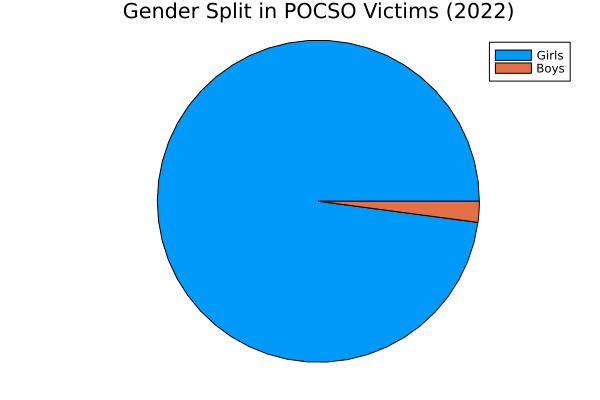

In [38]:
# Gender split pie chart

pie(
    gender_split.Gender,
    gender_split.Victims,
    title = "Gender Split in POCSO Victims (2022)"
)